In [6]:
import IPython
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from statistics import mode
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train_v = pd.read_csv('modified_diabetes1205_V2 (1).csv')

In [9]:
feature_set_dec = ['age', 'time_in_hospital', 'num_procedures', 'num_medications', 'number_outpatient_log',
                 'number_emergency_log', 'number_inpatient_log', 'number_diagnoses', 'metformin',
                 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide',
                 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                 'tolazamide', 'insulin', 'glyburide-metformin',
                 'race_1', 'race_2', 'race_3',
                 'race_4', 'gender_1',
                 'admission_source_id_4', 'admission_source_id_8', 'admission_source_id_9','admission_source_id_11',
                 'discharge_disposition_id_2', 'discharge_disposition_id_7',
                 'discharge_disposition_id_10', 'discharge_disposition_id_18',
                 'max_glu_serum_1.0',  # corrected name
                 'A1Cresult_1',         # correct name
                 'primary_diag_1','primary_diag_2','primary_diag_3','primary_diag_4',
                 'primary_diag_5','primary_diag_6','primary_diag_7','primary_diag_8']


In [10]:
train_input = train_v[feature_set_dec]
train_output = train_v['readmitted']
train_v['readmitted'].value_counts()

,count
readmitted,
0,79512
1,9607


In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split # Import train_test_split

print('Original dataset shape {}'.format(Counter(train_output)))
smt = SMOTE(random_state=20)
# Use fit_resample instead of fit_sample
train_input_new, train_output_new = smt.fit_resample(train_input, train_output)
print('New dataset shape {}'.format(Counter(train_output_new)))
train_input_new = pd.DataFrame(train_input_new, columns=list(train_input.columns))
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)

Original dataset shape Counter({0: 79512, 1: 9607})
New dataset shape Counter({0: 79512, 1: 79512})


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score # Import cross_val_score

forrest = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "entropy", min_samples_split=10)
print("Cross Validation score: {:.2%}".format(np.mean(cross_val_score(forrest, x_train_new, y_train_new, cv=10))))
forrest.fit(x_train_new, y_train_new)
print("Dev Set score: {:.2%}".format(forrest.score(x_test_new, y_test_new)))

Cross Validation score: 89.41%
Dev Set score: 89.81%


In [16]:
y_test_predict = forrest.predict(x_test_new)
pd.crosstab(pd.Series(y_test_new, name = 'Actual'), pd.Series(y_test_predict, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,2987,2589,5576
1,379,318,697
All,3366,2907,6273


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test_new, y_test_predict)))
print("Precision is {0:.2f}".format(precision_score(y_test_new, y_test_predict)))
print("Recall is {0:.2f}".format(recall_score(y_test_new, y_test_predict)))
print("AUC is {0:.2f}".format(roc_auc_score(y_test_new, y_test_predict)))

accuracy_forreste = accuracy_score(y_test_new, y_test_predict)
precision_forreste = precision_score(y_test_new, y_test_predict)
recall_forreste = recall_score(y_test_new, y_test_predict)
auc_forreste = roc_auc_score(y_test_new, y_test_predict)

Accuracy is 0.90
Precision is 0.94
Recall is 0.85
AUC is 0.90



Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     15685
           1       0.94      0.85      0.89     16120

    accuracy                           0.90     31805
   macro avg       0.90      0.90      0.90     31805
weighted avg       0.90      0.90      0.90     31805



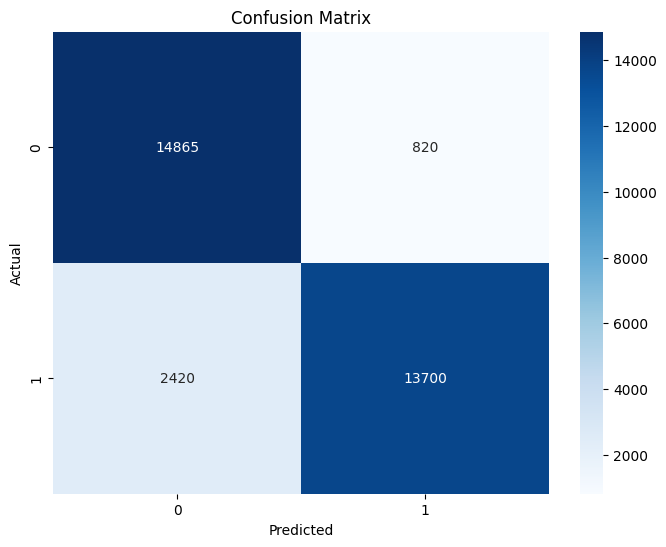

In [18]:
# Classification Report
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nClassification Report:\n")
print(classification_report(y_test_new, y_test_predict))

# Confusion Matrix Plot
conf_matrix = confusion_matrix(y_test_new, y_test_predict)

plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
